In [46]:
#TITLE OF THE PROJECT - Placement Prediction

In [47]:
#PLACEMENT PREDICTION
#DIYA UMMER
#Entri D21
#17-03-2025

In [48]:
#PLACEMENT PREDICTION
#DIYA UMMER
#Entri D21
#17-03-2025

In [49]:
#Dataset Details:
#Columns and Their Significance:

#StudentID: Serves as a unique identifier for tracking individual students, important for merging or referencing data.

#CGPA: A crucial metric reflecting academic performance; higher CGPA typically correlates with better placement chances.

#Internships: Practical experience often enhances employability; the number of internships may indicate a student's commitment to gaining real-world experience.

#Projects: Involvement in projects demonstrates practical skills and application of knowledge, which are attractive to employers.

#Workshops/Certifications: Additional qualifications can differentiate students in competitive job markets.

#AptitudeTestScore: Standardized scores often used by employers to gauge problem-solving and analytical skills.

#SoftSkillsRating: Soft skills are increasingly valued by employers; this rating can help predict a student's interpersonal effectiveness.

#ExtracurricularActivities: Participation can indicate a well-rounded candidate; students engaged in extracurriculars may show leadership and teamwork abilities.

#PlacementTraining: Indicates whether students received specific training to enhance their employability.

#SSC_Marks: Secondary education marks that may impact initial job opportunities or perceptions by employers.

#HSC_Marks: Higher secondary education marks that can also influence placement status.

#PlacementStatus: The target variable for prediction, showing whether a student was successfully placed after graduation.

In [50]:
#The goal of this project is to analyze a dataset related to student placements and predict whether a student will be placed or not based on various features.The dataset includes academic scores, participation in internships, workshops, and soft skills ratings amongothers.

In [51]:
#Data Story:
#Data Link: https://docs.google.com/spreadsheets/d/1dYnZYRG523bOxwRd1_tugnybRHRu3ObzZuPT_S2V39E/edit?usp=sharing


In [90]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [91]:
#Load the Dataset from a CSV file into a Pandas DataFrame.
data = pd.read_csv (r"C:\Users\Diya\Downloads\placementdata.csv")

In [92]:
#Load the Dataset from a CSV file into a Pandas DataFrame.
data = pd.read_csv (r"C:\Users\Diya\Downloads\placementdata.csv")

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [94]:
#Data Preprocessing
#Display the first few rows to understad the structure of the data.
df=data
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [95]:
#Data Cleaning
#Remove null rows
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [96]:
#Remove duplicate rows
df.duplicated().sum()

np.int64(0)

In [97]:
df.drop_duplicates(inplace=True)

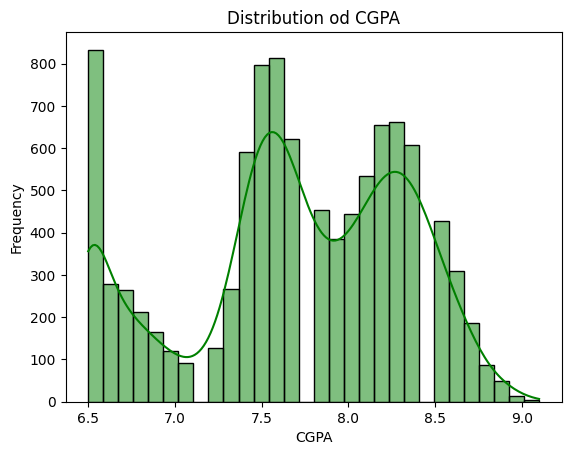

In [98]:
#5. Data Visualization 
#Use histograms to visualize the distribution of key features

sns.histplot(data['CGPA'], bins=30, color='green', kde=True)
plt.title( 'Distribution od CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

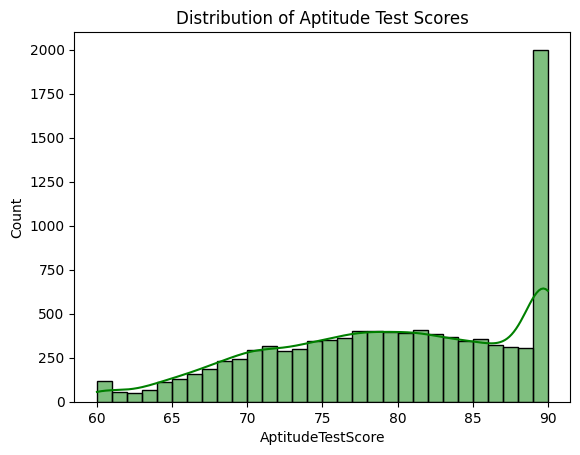

In [99]:
sns.histplot(data['AptitudeTestScore'], bins=30, color='green', kde=True)
plt.title( 'Distribution of Aptitude Test Scores')
plt.show

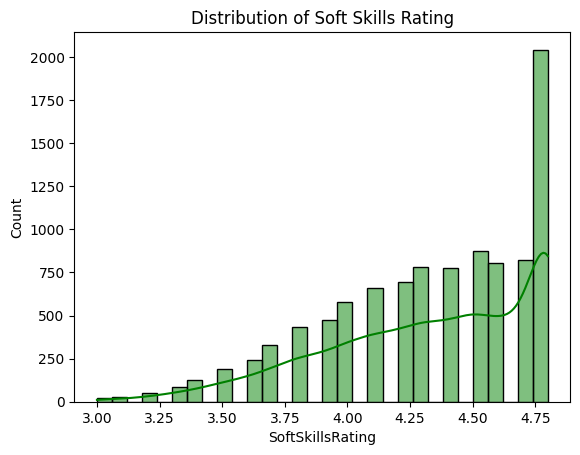

In [100]:
sns.histplot(data['SoftSkillsRating'], bins=30, color='green', kde=True)
plt.title('Distribution of Soft Skills Rating')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

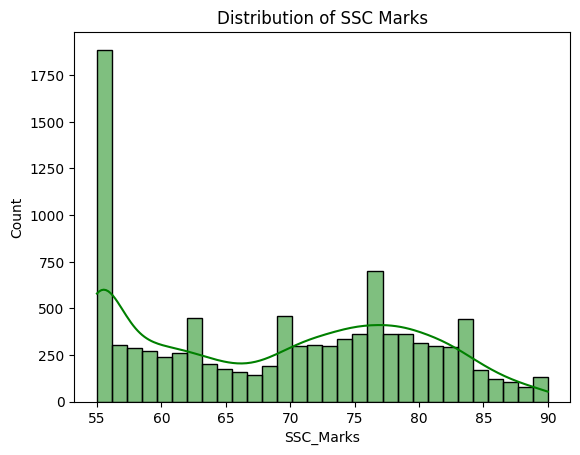

In [101]:
sns.histplot(data['SSC_Marks'], bins=30, color='green', kde=True)
plt.title('Distribution of SSC Marks')
plt.show

Text(0.5, 1.0, 'Distribution of HSC Marks')

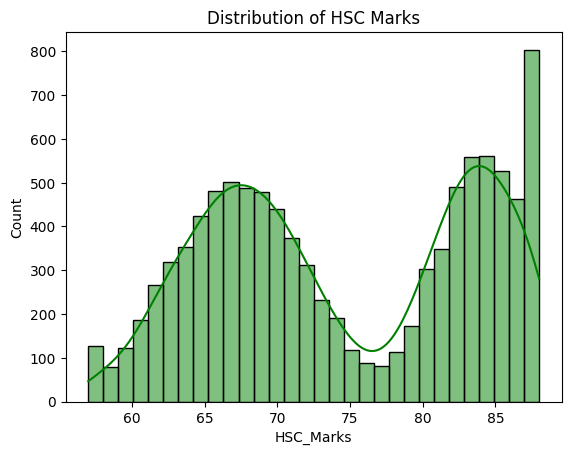

In [102]:
sns.histplot(data['HSC_Marks'], bins=30, color='green', kde=True)
plt.title('Distribution of HSC Marks')

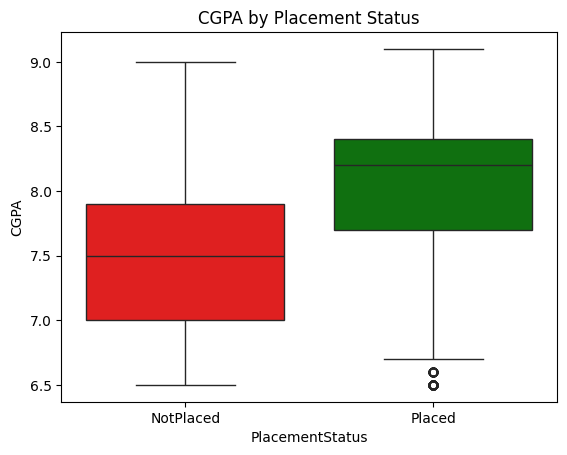

In [103]:
sns.boxplot(x='PlacementStatus', y='CGPA', data=data, palette=["red","green","lightblue"])
plt.title('CGPA by Placement Status')
plt.show()

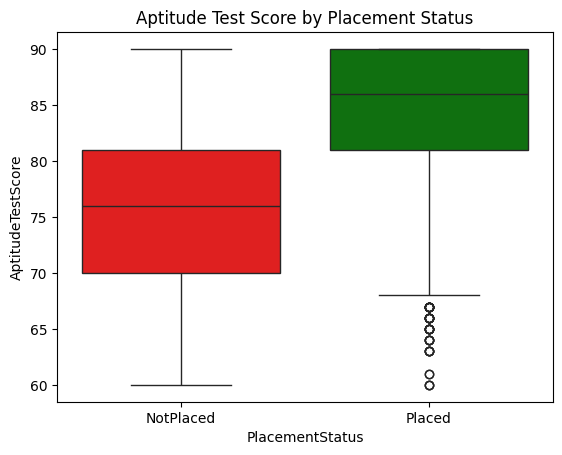

In [104]:
sns.boxplot(x='PlacementStatus', y='AptitudeTestScore', data=data, palette=["red","green", "lightblue"])
plt.title('Aptitude Test Score by Placement Status')
plt.show()

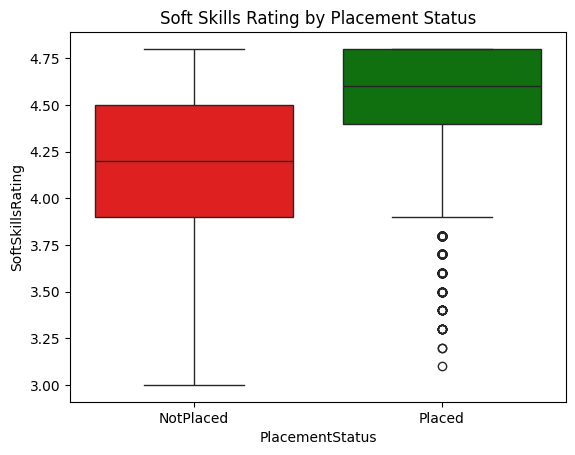

In [105]:
sns.boxplot(x='PlacementStatus', y='SoftSkillsRating', data=data, palette=["red","green", "lightblue"])
plt.title('Soft Skills Rating by Placement Status')
plt.show()

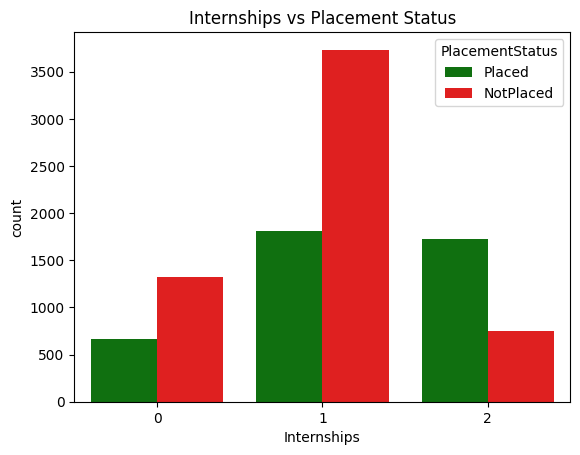

In [106]:
sns.countplot(x='Internships', hue='PlacementStatus', data=data,  palette=["green","red"])
plt.title('Internships vs Placement Status')
plt.show()

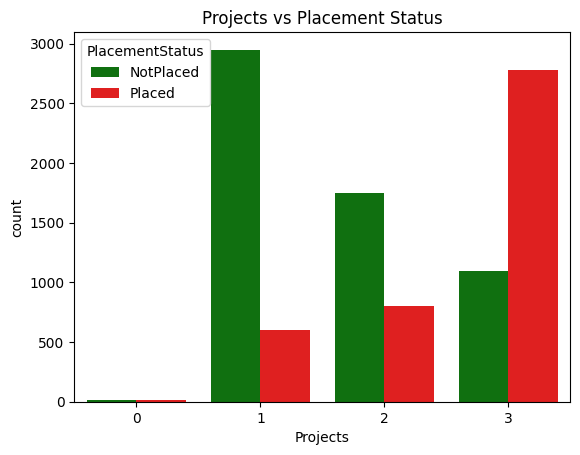

In [107]:
sns.countplot(x='Projects', hue='PlacementStatus', data= data, palette=["green","red"])
plt.title('Projects vs Placement Status')
plt.show()

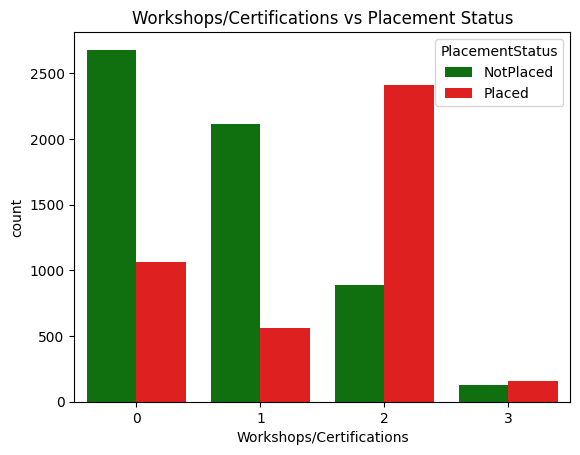

In [108]:
sns.countplot(x='Workshops/Certifications', hue='PlacementStatus', data=data, palette=["green","red"])
plt.title('Workshops/Certifications vs Placement Status')
plt.show()

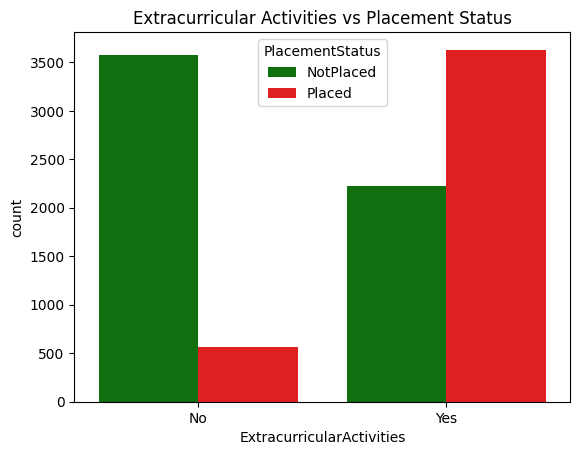

In [109]:
sns.countplot(x='ExtracurricularActivities', hue='PlacementStatus', data=data, palette=["green","red"])
plt.title('Extracurricular Activities vs Placement Status')
plt.show()

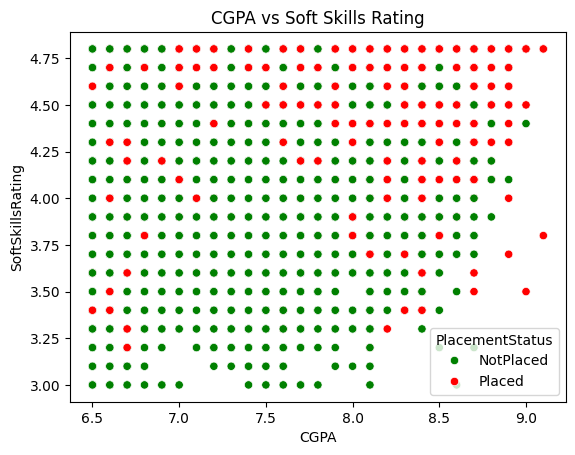

In [110]:
sns.scatterplot(x='CGPA', y='SoftSkillsRating', hue='PlacementStatus', data=data, palette=["green","red"])
plt.title('CGPA vs Soft Skills Rating')
plt.show()

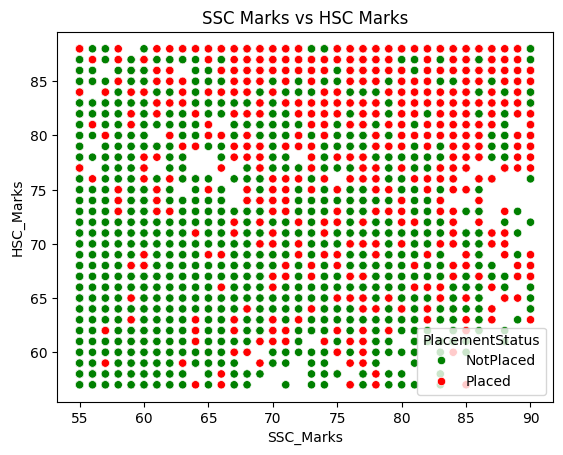

In [111]:
sns.scatterplot(x='SSC_Marks', y='HSC_Marks', hue='PlacementStatus', data=data, palette=["green","red"])
plt.title('SSC Marks vs HSC Marks')
plt.show()

In [112]:
data['ExtracurricularActivities'] = data['ExtracurricularActivities'].astype('category')
data['PlacementTraining'] = data['PlacementTraining'].astype('category')

In [113]:
X = data.drop(['PlacementStatus'], axis=1)
y = data['PlacementStatus'].map({'Placed': 1, 'NotPlaced':0})

In [114]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()

In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [124]:
pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('model', RandomForestClassifier())
])

In [126]:
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'para_grid': {
            'model_n_estimators': [100, 200, 300],
            'model_max_depth': [None, 10, 20, 30],
            'model_min_samples_split': [2, 5, 10],
            ',ode;_min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'model_C': [0.1, 1, 10],
            'model_kernal': ['linear', 'rbf'],
            'model_gamma': ['scale', 'auto'],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'model_n_neighbors': [3, 5, 7, 9],
            'model_weights': ['uniform', 'distance']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}
        

In [161]:
for name, config in models.items():
    print(f"model eva {name}:")

    pipeline.set_params(model=config['model'])

if config['param_grid']:
       grid_search = GridSearchCV(estimator=pipeline, param_grid=confid['param_grid'], cv=3, scoring='accuracy', n_jobs=-1)
       gridsearch.fit(X_train, y_train)
       best_model = grid_search.best_estimator_
       print("Best parameters:", grid_search.best_params_)
else:
     pipeline.fit(X_train, y_train)
     best_model = pipeline

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")


model eva RandomForest:
model eva SVM:
model eva KNN:
model eva NaiveBayes:
Accuracy: 0.787
F1 Score: 0.7418181818181818
Confusion Matrix:
 [[962 210]
 [216 612]]




In [172]:
import joblib

#Save the complete Pipeline
joblib.dump(best_model, 'best_model.pk1')

['best_model.pk1']

In [5]:
import pandas as pd
import joblib

# Load the complete pipeline
model_path = 'C:/Users/DIYA/best_model.pk1'
pipeline = joblib.load(model_path)

# Prepare new data for prediction including StudentID (if required)
new_data = pd.DataFrame({
    'StudentID': [1],  # Include this if the model was trained with it
    'CGPA': [8.2],
    'Internships': [1],
    'Projects': [2],
    'Workshops/Certifications': [1],
    'AptitudeTestScore': [85],
    'SoftSkillsRating': [4.5],
    'ExtracurricularActivities': ['Yes'],
    'PlacementTraining': ['Yes'],
    'SSC_Marks': [75],
    'HSC_Marks': [85]
})

# Ensure the new data has the correct structure
expected_columns = ['StudentID', 'CGPA', 'Internships', 'Projects', 
                    'Workshops/Certifications', 'AptitudeTestScore', 
                    'SoftSkillsRating', 'ExtracurricularActivities', 
                    'PlacementTraining', 'SSC_Marks', 'HSC_Marks']

# Check for any missing expected columns
for col in expected_columns:
    if col not in new_data.columns:
        new_data[col] = None  # Handle missing columns as needed

# Make predictions
try:
    predictions = pipeline.predict(new_data)
    # Output predictions
    print("Predicted Placement Status:", "Placed" if predictions[0] == 1 else "Not Placed")
except KeyError as e:
    print(f"KeyError: {e}. Ensure that the new data has the same columns as the training data.")

Predicted Placement Status: Placed


In [ ]:
#CONCLUSION
#The notebook aims to provide a comprehensive analysis of factors impacting student placement. By exploring the dataset visually and statistically, the notebook lays a foundation for developing predictive models that can assist educational institutions in understanding and enhancing their placement processes. The insights derived from this analysis could be valuable for students, educators, and employers alike, contributing to better alignment between student capabilities and job market requirements.
#Summarize the findings from the analysis, including key insights about which features are most predictive of placement.
#Discuss potential next steps, such as further model refinement or exploring additional datasets for more comprehensive analysis.
#This end-to-end approach provides a clear pathway from data loading to model evaluation in predicting student placements. It emphasizes the importance of data exploration, preprocessing, model training, and evaluation, ensuring a thorough understanding of the dataset and the predictive capabilities of the chosen model